In [16]:
from triqs.plot.mpl_interface import *
from triqs.gf import *

# change scale of all figures to make them bigger
import matplotlib as mpl
from h5 import *

import triqs.utility.mpi as mpi

from ctint_tutorial import Solver,Solver2
import numpy as np

In [17]:
def fuse_eo(u):
    n = len(u)
    assert n%2==0
    m = n//2
    v = np.zeros(m,dtype=type(u[0]))
    for k in range(m-1):
        v[k] = u[2*k]+u[2*k+1]
    return v

In [243]:
with HDFArchive("data/test_solver.h5",'r') as A:
    Ns = A['N']
    print(f"Ns = {Ns}")

with HDFArchive("data/test_solver2.h5",'r') as A:
    Ns2 = A['N']
    print(f"Ns2 = {Ns2}")
    beta = A['beta']
    print(f"beta = {beta}")
    U = A['U']
    print(f"U = {U}")

Ns = 10
Ns2 = 3
beta = 5
U = 5


## Histogram

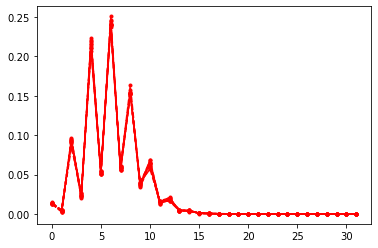

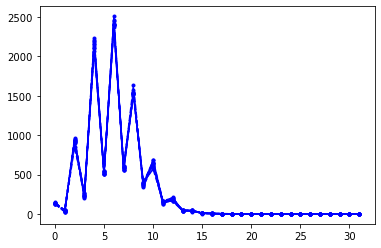

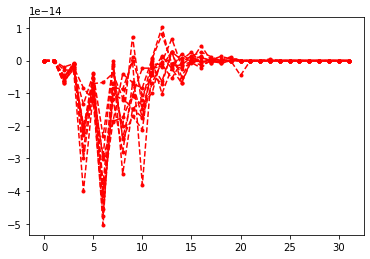

In [244]:
with HDFArchive("data/test_solver.h5",'r') as A:
    for i in range(Ns):
        N = len(A[f'hist_{i}'])
        k = np.arange(N)
        if True:
            plt.plot(k,A[f'hist_{i}'],'r.--')
        else:
            plt.plot(k,A[f'hist_{i}'],'r.')
    plt.show()

    for i in range(Ns):
        N = len(A[f'hist_sign_{i}'])
        k = np.arange(N)
        #print(A[f'hist_sign_{i}'][0:2])
        #if A[f'hist_sign_{i}'][0] != 0:
        plt.plot(k,A[f'hist_sign_{i}'].real,'b.--')
    plt.show()

    for i in range(Ns):
        N = len(A[f'hist_sign_{i}'])
        k = np.arange(N)
        #print(A[f'hist_sign_{i}'][0:2])
        plt.plot(k,A[f'hist_sign_{i}'].imag,'r.--')
    plt.show()

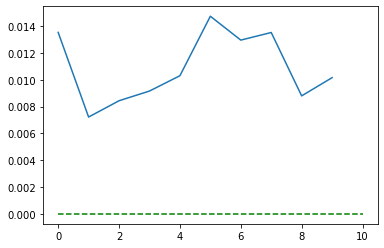

In [245]:
with HDFArchive("data/test_solver.h5",'r') as A:
    k = np.arange(Ns)
    #h1 = np.zeros(Ns)
    Z1 = np.zeros(Ns,dtype=complex)
    for i in range(Ns):
        #h1[i] = A[f"hist_{i}"][1]
        Z1[i] = A[f"hist_sign_{i}"][1]/A[f"hist_sign_{i}"][0]/U/beta
    plt.plot(k,Z1.real)
    #plt.plot(k,Z1.imag)     
    #plt.plot(k,h1)
    plt.hlines(0,0,Ns,colors='g',linestyles='--')
plt.show()

# of samples: 3


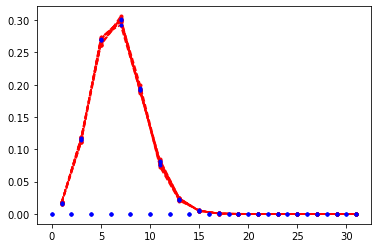

In [246]:
with HDFArchive("data/test_solver.h5",'r') as A:
    for i in range(Ns):
        N = len(A[f'hist_{i}'])
        k = np.arange(N//2)*2+1
        h = fuse_eo(A[f'hist_{i}'][:N-N%2])
        if True:
            plt.plot(k,h,'r.--')
        else:
            plt.plot(k,h,'r.')

    with HDFArchive("data/test_solver2.h5",'r') as B:
        print(f"# of samples: {B['N']}") 
        for i in range(Ns2):
            N = len(B[f'hist_{i}'])
            k = np.arange(N)
            plt.plot(k,B[f'hist_{i}'],'b.')

plt.show()

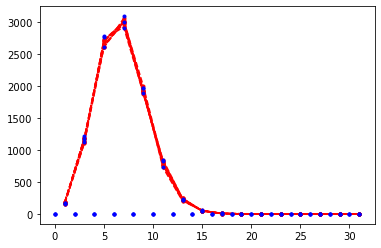

In [247]:
with HDFArchive("data/test_solver.h5",'r') as A:
    for i in range(Ns):
        N = len(A[f'hist_sign_{i}'])
        k = np.arange(N//2)*2+1
        if True: #A[f'hist_sign_{i}'][0] != 0:
            h = fuse_eo(A[f'hist_sign_{i}'][:N-N%2])
            #print(h[0])
            if True:
                plt.plot(k,h.real,'r.--')
            else:
                plt.plot(k,h.real,'r.')

    k0 = 1
    with HDFArchive("data/test_solver2.h5",'r') as B:
        for i in range(Ns2):
            N = len(B[f'hist_sign_{i}'])
            k = np.arange(N)
            if B[f'hist_sign_{i}'][k0] != 0 and A[f'hist_sign_{i}'][k0-1]+A[f'hist_sign_{i}'][k0] != 0:
                h = B[f'hist_sign_{i}']/B[f'hist_sign_{i}'][k0] * (A[f'hist_sign_{i}'][k0]+A[f'hist_sign_{i}'][k0-1])
                #print(h[1])
                plt.plot(k,h.real,'b.')
            else:
                print(f"invalid {i}")
plt.show()

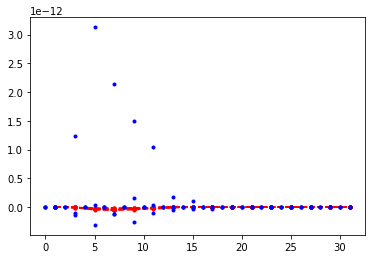

In [248]:
with HDFArchive("data/test_solver.h5",'r') as A:
    for i in range(Ns):
        N = len(A[f'hist_sign_{i}'])
        k = np.arange(N//2)*2+1
        if True : #A[f'hist_sign_{i}'][0] != 0:
            h = fuse_eo(A[f'hist_sign_{i}'][:N-N%2])
            if True:
                plt.plot(k,h.imag,'r.--')
            else:
                plt.plot(k,h.real,'r.')

    k0 = 1
    with HDFArchive("data/test_solver2.h5",'r') as B:
        for i in range(Ns2):
            N = len(B[f'hist_sign_{i}'])
            k = np.arange(N)
            if B[f'hist_sign_{i}'][k0] != 0 and A[f'hist_sign_{i}'][k0-1]+A[f'hist_sign_{i}'][k0] != 0:
                h = B[f'hist_sign_{i}']/B[f'hist_sign_{i}'][k0] * (A[f'hist_sign_{i}'][k0]+A[f'hist_sign_{i}'][k0-1])
                plt.plot(k,h.imag,'b.')
            else:
                print(f"invalid {i}")
plt.show()

## Density

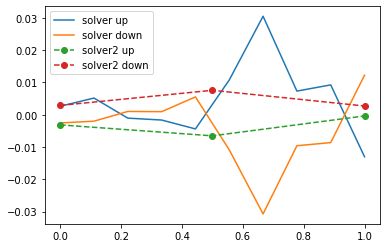

In [249]:
with HDFArchive("data/test_solver.h5",'r') as A:
    k = np.linspace(0,1,Ns)
    n = np.zeros((Ns,2),dtype=complex)
    n2 = np.zeros((Ns,2),dtype=complex)
    for i in range(Ns):
        n[i] = A[f"n_{i}"]

plt.plot(k,n.real,label=["solver up","solver down"])

with HDFArchive("data/test_solver2.h5",'r') as B:
    k = np.linspace(0,1,Ns2)
    n2 = np.zeros((Ns2,2),dtype=complex)
    for i in range(Ns2):
        n2[i] = B[f"n_{i}"]

plt.plot(k,n2.real,'o--',label=["solver2 up","solver2 down"])

plt.legend()
#plt.ylim(-300,300)
plt.show()

#plt.plot(k,n.imag,label=["solver up","solver down"])
#plt.plot(k,n2.imag,'--',label=["solver2 up","solver2 down"])
#plt.legend()
#plt.show()

In [250]:
print(n)
print(n2)

[[ 0.00260525+2.02755819e-15j -0.00256525+2.02610261e-15j]
 [ 0.00513656+2.30839384e-15j -0.00201656+2.30746306e-15j]
 [-0.00107528+1.63890161e-15j  0.00099528+1.63951531e-15j]
 [-0.00166378+2.35000078e-15j  0.00092378+2.35148858e-15j]
 [-0.00441339+1.37234313e-15j  0.00549339+1.37465213e-15j]
 [ 0.01073143+1.96346185e-15j -0.01089143+1.96593920e-15j]
 [ 0.0304629 +1.54643431e-15j -0.0307229 +1.54656598e-15j]
 [ 0.00729792+1.44084275e-15j -0.00961792+1.44010774e-15j]
 [ 0.00921108+2.45957033e-16j -0.00865108+2.53347048e-16j]
 [-0.01302786+2.04153114e-15j  0.01220786+2.04055696e-15j]]
[[-0.00316496-1.59366436e-15j  0.00286145-1.56076921e-15j]
 [-0.00655379-1.61545763e-15j  0.00754059-1.58976851e-15j]
 [-0.00039822-1.61908942e-15j  0.00267894-1.61802384e-15j]]


## Double Occupancy

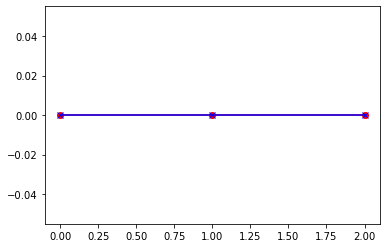

In [251]:
with HDFArchive("data/test_solver.h5",'r') as A:
    with HDFArchive("data/test_solver2.h5",'r') as B:
        d0 = np.zeros(Ns2,dtype=complex)
        for i in range(Ns2):
            d0[i] = B[f"d0_{i}"]
        k = np.arange(Ns2)
plt.plot(k,d0.real,'ro-',label="bare")
plt.plot(k,0+0*k,'bx-',label="bare")
plt.show()

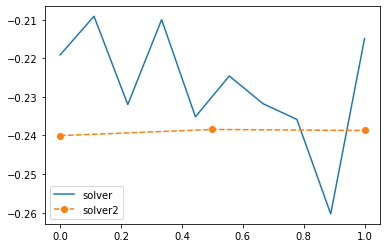

In [252]:
with HDFArchive("data/test_solver.h5",'r') as A:
    k = np.linspace(0,1,Ns)
    d = np.zeros(Ns,dtype=complex)
    d2 = np.zeros(Ns,dtype=complex)
    for i in range(Ns):
        d[i] = A[f"d_{i}"]

plt.plot(k,d.real,label="solver")

with HDFArchive("data/test_solver2.h5",'r') as B:
    k = np.linspace(0,1,Ns2)
    d2 = np.zeros(Ns2,dtype=complex)
    for i in range(Ns2):
        d2[i] = -B[f"d_{i}"]

plt.plot(k,d2.real,"o--",label="solver2")

plt.legend()
#plt.ylim(-100,100)
plt.show()

#plt.plot(k,d.imag,label="solver")
#plt.plot(k,d2.imag,label="solver2")
#plt.legend()
#plt.show()

In [253]:
print(d)
print(d2)

[-0.21911018-8.30599720e-18j -0.20910039-7.12625896e-17j
 -0.23197827-7.74162012e-17j -0.20997353+8.23019122e-18j
 -0.23515711+1.18122935e-17j -0.22457791-1.76345528e-17j
 -0.23176564-7.33744950e-17j -0.23584088+4.54428387e-17j
 -0.26032026-2.90818730e-16j -0.21490431-1.00293561e-17j]
[-0.2400356 -4.59682022e-17j -0.23843326+6.40089175e-18j
 -0.23870285-2.23507930e-18j]


## GF

In [254]:
Nom = 10 # # of Matsubara frquencies
xm = (2*Nom+1)*np.pi/beta

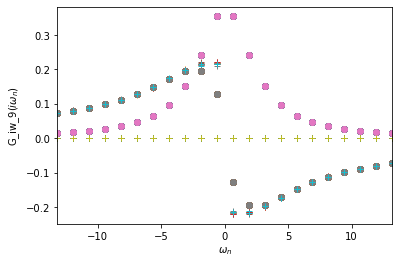

In [255]:
with HDFArchive("data/test_solver.h5",'r') as A:
    for i in range(Ns):
        oplot(A[f'G0_iw_{i}'], 'o')
        oplot(A[f'G_iw_{i}'], '+')

plt.legend().remove()
plt.xlim(-xm,xm)
plt.show()

KeyError: 'Key G0_iw_3 does not exist.'

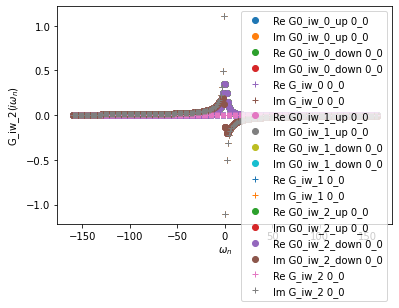

In [256]:
with HDFArchive("data/test_solver2.h5",'r') as A:
    for i in range(Ns):
        oplot(A[f'G0_iw_{i}'], 'o')
        oplot(A[f'G_iw_{i}'], '+')
        
plt.legend().remove()
plt.xlim(-xm,xm)
plt.show()

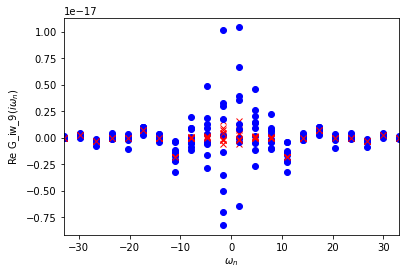

In [ ]:
with HDFArchive("data/test_solver.h5",'r') as A:
    with HDFArchive("data/test_solver2.h5",'r') as B:
        for i in range(B[f'N']):
            oplot(A[f'G_iw_{i}'].real, 'bo')
            oplot(B[f'G_iw_{i}'].real, 'rx')

plt.xlim(-xm,xm)
plt.legend().remove()
plt.show()

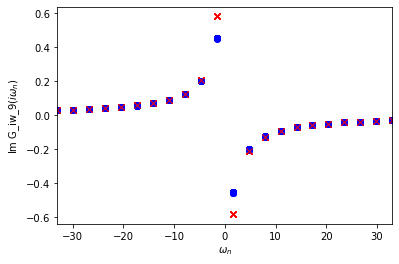

In [ ]:
with HDFArchive("data/test_solver.h5",'r') as A:
    with HDFArchive("data/test_solver2.h5",'r') as B:
        for i in range(B[f'N']):
            oplot(A[f'G_iw_{i}'].imag, 'bo')
            oplot(B[f'G_iw_{i}'].imag, 'rx')

plt.xlim(-xm,xm)
plt.legend().remove()
plt.show()